In [1]:
# Import for AlphaFold
# part 1
from Bio.PDB import *
import nglview as nv
import ipywidgets
# part 2
from Bio import SeqIO
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

In [37]:
## Model using AlphaFold
pdb_parser = PDBParser()
structure = pdb_parser.get_structure("lpxC", "AF-A0A084CMV3-F1-model_v4.pdb")
view = nv.show_biopython(structure)
view

NGLWidget()

In [39]:
## Model using RCSB PBD with small molecules including LPC-009 
view2 = nv.show_pdbid("3p3g")
view2

NGLWidget()

In [2]:
# Import for Enzyme Kinetics
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

LpxC Reaction:

UDP-3-O-[(3R)-3-hydroxyacyl]-N-acetyl-alpha-D-glucosamine + $H_{2}O$ = UDP-3-O-[(3R)-3-hydroxyacyl]-alpha-D-glucosamine + Acetate

In [50]:
## 30C
## KCat: BRENDA; wild-type; turnover number
## KM: BRENDA; wild-type; mM
# Constants
K_cat = 1.5
K_M = 0.00019
# Variables
E_0 = 10e-3 ## Initial enzyme concentration
# ODE
def MM_dynamics(t, y, K_cat, K_M, E_0):
    # y[0] = B product
    # y[1] = A reactant
    # Rate of change of the variables (vector)
    dydt = np.zeros(2)
    v = K_cat*E_0*(y[1]/(K_M+y[1]))
    # Positive and negative rates for the product and the reactant
    dydt[0] = v
    dydt[1] = -v
    return dydt

In [53]:
# Initial Conditions
y0 = [0,100]
# Time span of 0 to 5000 with 1000 points in between 
t = np.linspace(0, 5000, 1000)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat,K_M,E_0),tspan,y0,t_eval=t)

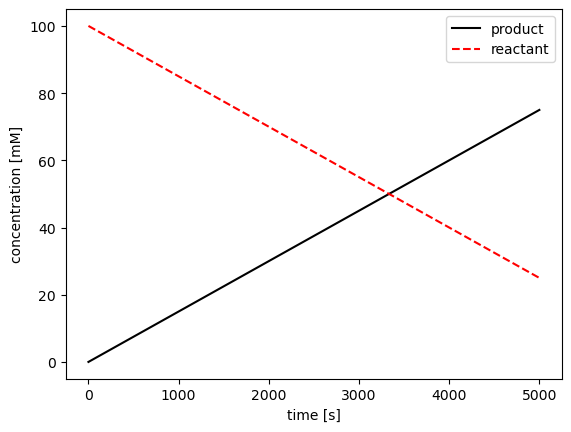

In [54]:
plt.plot(t,ode_sol.y[0],'k-')
plt.plot(t,ode_sol.y[1],'r--')
plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['product','reactant']);

In [55]:
## 1C
## KCat: BRENDA; wild-type; turnover number
## KM: BRENDA; wild-type; mM
# Constants
K_cat = 0.09
K_M = 0.0006
# Variables
E_0 = 10e-3 ## Initial enzyme concentration
# ODE
def MM_dynamics(t, y, K_cat, K_M, E_0):
    # y[0] = B product
    # y[1] = A reactant
    # Rate of change of the variables (vector)
    dydt = np.zeros(2)
    v = K_cat*E_0*(y[1]/(K_M+y[1]))
    # Positive and negative rates for the product and the reactant
    dydt[0] = v
    dydt[1] = -v
    return dydt

In [56]:
# Initial Conditions
y0 = [0,100]
# Time span of 0 to 5000 with 1000 points in between 
t = np.linspace(0, 5000, 1000)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat,K_M,E_0),tspan,y0,t_eval=t)

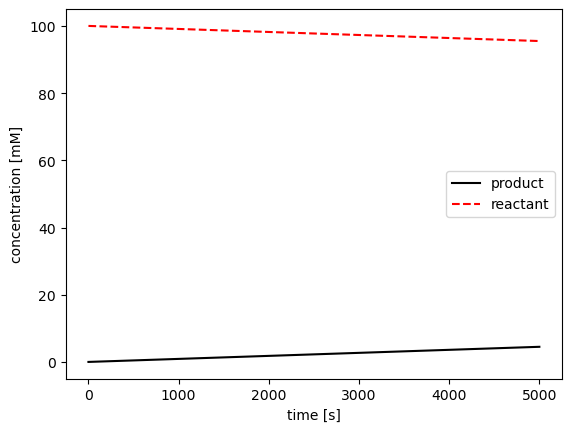

In [57]:
plt.plot(t,ode_sol.y[0],'k-')
plt.plot(t,ode_sol.y[1],'r--')
plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['product','reactant']);

In [58]:
## ANDREWS ET AL PARAMETERS
# Constants
K_cat = 3.3
K_M = 0.00019
# Variables
E_0 = 8.3e-4 ## Initial enzyme concentration
# ODE
def MM_dynamics(t, y, K_cat, K_M, E_0):
    # y[0] = B product
    # y[1] = A reactant
    # Rate of change of the variables (vector)
    dydt = np.zeros(2)
    v = K_cat*E_0*(y[1]/(K_M+y[1]))
    # Positive and negative rates for the product and the reactant
    dydt[0] = v
    dydt[1] = -v
    return dydt

In [61]:
# Initial Conditions
y0 = [0,100]
# Time span of 0 to 10000 with 1000 points in between 
t = np.linspace(0, 10000, 1000)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat,K_M,E_0),tspan,y0,t_eval=t)

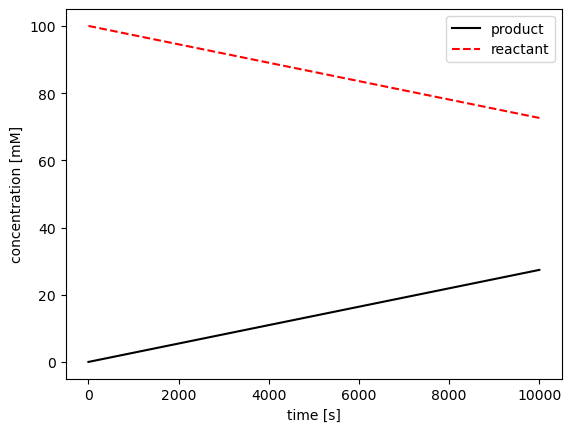

In [62]:
plt.plot(t,ode_sol.y[0],'k-')
plt.plot(t,ode_sol.y[1],'r--')
plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['product','reactant']);